In [92]:
import numpy as np
import matplotlib.pylab as plt
cadenas=[]
degrade= 0.2
color=["plum","m","darkgreen","firebrick","salmon","magenta","peru","c"]

In [93]:
def gauss(x,mu=0,sigma=1):
    return 1.0/np.sqrt(2*np.pi*sigma**2)*np.exp(-0.5*(x-mu)**2/sigma**2)

In [94]:
x = np.linspace(-4*sigma+mu,4*sigma+mu)

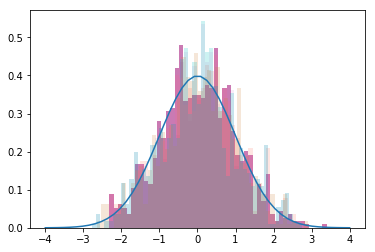

In [95]:
aux=0
M=8
sigma=1
mu=0
for i in range(1,M+1):
    archivo=np.genfromtxt("cadena_"+str(i)+".txt")
    plt.hist(archivo,bins=50,density=True,alpha=degrade,color=color[aux])
    cadenas.append(archivo)
    # degrade +=0.1
    aux+=1
plt.plot(x,gauss(x,mu,sigma))
plt.savefig("Histograma.pdf")
plt.show()

In [96]:
cadenas=np.array(cadenas)
N=len(archivo)
M=8

In [97]:
promedios=np.mean(cadenas,axis=1)
varianzas=np.std(cadenas,axis=1)
theta=1.0/(M)*np.sum(promedios)

In [98]:
B=N/(M-1.0)*(np.sum((promedios-theta)**2))

In [99]:
W=(1.0/M)*np.sum(varianzas**2)

In [100]:
V=((N-1)/N)*W + (M+1)/(M*N)*B
V

1.0007163109016002

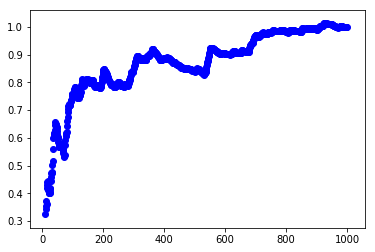

In [101]:
for i in range(10,N):
    primedios=np.mean(cadenas[:,:i],axis=1)
    varianzas=np.std(cadenas[:,:i],axis=1)
    theta=1.0/(M)*np.sum(promedios)
    B=N/(M-1.0)*(np.sum((promedios-theta)**2))
    W=(1.0/M)*np.sum(varianzas**2)
    V=((N-1)/N)*W + (M+1)/(M*N)*B
    plt.scatter(i,V,color="b")
plt.savefig("Estadistica_gelman_rubin.pdf")
plt.show()